# Super Dense Coding

Super Dense Coding is a foundational quantum communication protocol in which Alice (the sender) utilizes quantum resources to transmit two classical bits to Bob (the receiver) by sending only a single quantum bit (qubit). The necessary quantum resources for this protocol are:

1. Quantum Communication Channel
2. Entanglement
It is important to note that this protocol assumes Alice and Bob are spatially separated.

The entire procedure can be summarized in the following steps:

1. __Entanglement Generation:__ In the initial phase, an entangled state is created between Alice's qubit and Bob's qubit. This step is usually performed in advance.
2. __Encoding:__ Alice manipulates her qubit using quantum gates to encode her desired two-bit message.
3. __Transmission:__ Alice sends her manipulated qubit to Bob through a quantum communication channel.
4. __Decoding:__ Upon receiving the qubit, Bob applies specific quantum gates to decode the transmitted message.

5. __Measurement:__ Bob performs measurements on both qubits to determine Alice's message.

While this protocol involves two qubits, not just one, the power of quantum mechanics lies in enabling such efficient communication. If classical bits were used instead of qubits, it would be impossible to transmit more than one classical bit of information to Bob in this manner. Quantum entanglement uniquely facilitates this protocol, showcasing a capability that has no classical counterpart.

## Step 1: Entanglement Generation:
In this protocol, Alice and Bob share one of the following Bell states, which are maximally entangled:

1. $|\Phi^+⟩ = \dfrac{1}{\sqrt{2}} (|00⟩+|11⟩)$
2. $|\Phi^-⟩ = \dfrac{1}{\sqrt{2}} (|00⟩-|11⟩)$
3. $|\Psi^+⟩ = \dfrac{1}{\sqrt{2}} (|01⟩+|10⟩)$
4. $|\Psi^-⟩ = \dfrac{1}{\sqrt{2}} (|01⟩-|10⟩)$

In this discussion, we assume that Alice and Bob share the Bell state
$|\Phi^+⟩$. This state represents the initial entanglement required for the Super Dense Coding protocol.

# Alice Encoding for sending an arbitrary bitstring
Alice can send one of four possible bitstrings:
$'00', '01', '10'$, and $'11'$, to Bob. The following table represents how the information can be encoded in a quantum state.

| **Message**             | **Alice Encoding** | **Prepared State** |
|--------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------|
| **00**   | $\mathbb{I}$ | $|\Phi^+⟩ $
| **01**     | $X$ |   $|\Phi^-⟩ $
| **10**      | $Z$ |  $|\Psi^+⟩ $
| **11**     | $ZX$ |  $|\Psi^-⟩ $  

This encoding allows Alice to manipulate her half of the entangled state to encode the desired message efficiently before sending her qubit to Bob.

## Transmission
In the transmission step of the Super Dense Coding protocol, Alice sends her encoded qubit to Bob through a quantum communication channel.

## Decoding:

Once Bob receives the qubit, he will proceed to the Decoding Step to extract the encoded information by performing measurements on the combined state of both qubits. This step ensures the successful retrieval of the classical bitstring originally encoded by Alice.

## Measurement:
In the measurement step, Bob will measure both qubits to figure out the Alice's message.

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

In [16]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import QasmSimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram

In [5]:
def qplot(x):
  return x.draw('mpl', scale=0.8, fold=False, cregbundle=False)

In [28]:
def encoder(x):
  d = len(x)
  circ = QuantumCircuit(d)
  '''
  x is string
  '''
  if x == '00':
    circ.i(0)
  elif x == '01':
    circ.x(0)
  elif x == '10':
    circ.z(0)
  elif x == '11':
    circ.x(0)
    circ.z(0)

  gate = circ.to_gate()
  gate.name = "Encoder"

  return gate

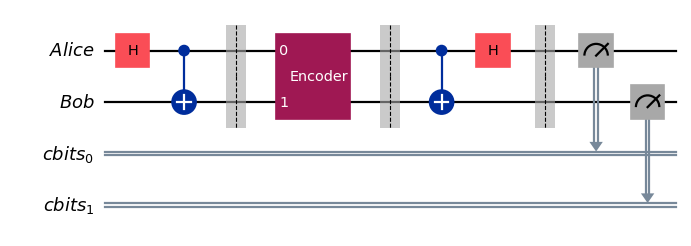

In [33]:
qa = QuantumRegister(1, name = 'Alice')
qb = QuantumRegister(1, name = 'Bob')
cbits = ClassicalRegister(2, name = "cbits")
circuit = QuantumCircuit(qa, qb, cbits)

# Create entanglement
circuit.h(qa)
circuit.cx(qa, qb)
circuit.barrier()

# Alice encoding
circuit.append(encoder('01'), [qa, qb])
circuit.barrier()

# Bob Decoding
circuit.cx(qa, qb)
circuit.h(qa)
circuit.barrier()

circuit.measure([0,1], cbits)


qplot(circuit)

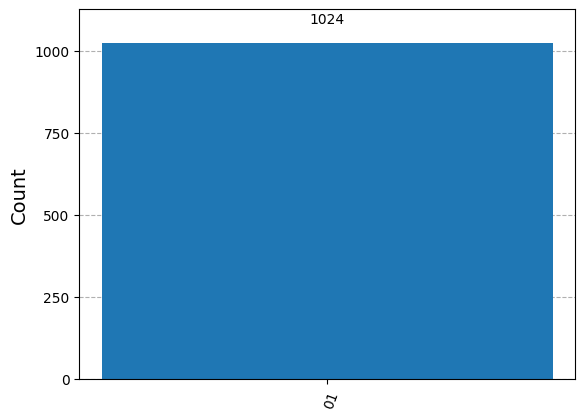

In [35]:
backend = QasmSimulator()
trans_circ = transpile(circuit.reverse_bits(), backend)
job = backend.run(trans_circ)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)